## Importar librerías y cargar datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_csv("../data/processed/country_risk_score.csv")
df = df.sort_values("risk_score", ascending=True)
df


,country,risk_score
3,Peru,23.164129
0,Brazil,39.038559
2,Mexico,59.358124
1,Colombia,70.420854


## Crear gráfico de barras horizontales

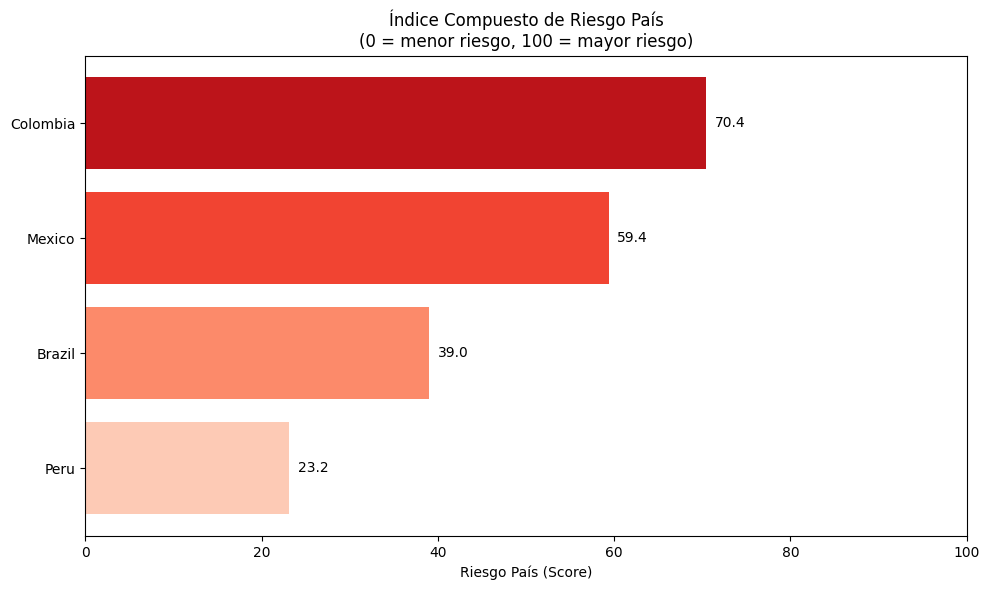

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar y ordenar por riesgo descendente
df = pd.read_csv("../data/processed/country_risk_score.csv")
df = df.sort_values("risk_score", ascending=False).reset_index(drop=True)

# Crear paleta basada en el riesgo (color más oscuro = más riesgo)
colors = sns.color_palette("Reds", n_colors=len(df))
colors = colors[::-1]  # invertir la escala: más rojo = más riesgo
color_dict = dict(zip(df['country'], colors))

# Graficar con colores personalizados
plt.figure(figsize=(10, 6))
bars = plt.barh(
    y=df['country'],
    width=df['risk_score'],
    color=[color_dict[c] for c in df['country']]
)

# Agregar etiquetas
for i, bar in enumerate(bars):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
            f"{df['risk_score'][i]:.1f}", va='center', fontsize=10)

plt.title("Índice Compuesto de Riesgo País\n(0 = menor riesgo, 100 = mayor riesgo)")
plt.xlabel("Riesgo País (Score)")
plt.xlim(0, 100)
plt.tight_layout()
plt.gca().invert_yaxis()  # mayor riesgo arriba
plt.show()
